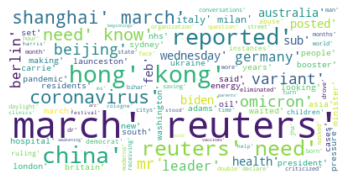

In [27]:
import spacy
from newsapi import NewsApiClient
import pickle
import en_core_web_lg
import pandas as pd
from collections import Counter
from string import punctuation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nlp_eng = spacy.load('en_core_web_lg')
newsapi = NewsApiClient(api_key='f17088c4149b4d2ea2e3946b824c89e5')

#temp = newsapi.get_everything(q='coronavirus', language='en', from_param='2022-02-25', to='2022-03-25', sort_by='relevancy', page=5)
#print(temp)
def getAllArticles(x):
    temp = newsapi.get_everything(q='coronavirus', language='en',
                                  from_param='2022-02-25', to='2022-03-25', sort_by='relevancy', page=x)
    #print(temp)
    return temp


articles = list(map(getAllArticles, range(1, 6)))
#print(articles)

dados = []

for i, article in enumerate(articles):
    for x in article['articles']:
        title = x['title']
        description = x['description']
        content = x['content']
        dados.append({'title': title, 'desc': description, 'content': content})
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

results = []

def get_keywords_eng(text):
    result = []
    pos_tag = ['PROPN', 'VERB', 'NOUN']
    doc = nlp(text.lower())
    for token in doc:
        if (token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if (token.pos_ in pos_tag):
            result.append(token.text)
    #print(result)
    return result

for content in df.content.values:
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])

df['keywords'] = results


text = str(results)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()